<a href="https://colab.research.google.com/github/adrianoduque97/argument-minning/blob/main/ArgumentMinning_TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Argument Minning by Adrian Duque

### Tesis for argument classification using several aproaches such as Machine Learning, Deep Learning and NLP

# 1. Python and Data Imports

In [117]:
import pandas as pd 
import numpy as np 
from nltk.tokenize import word_tokenize 
from nltk import pos_tag 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import LabelEncoder 
from collections import defaultdict 
from nltk.corpus import wordnet as wn 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve,roc_curve, roc_auc_score, auc
import seaborn as sn
from sklearn import feature_extraction

In [41]:
# Extraccion de CSV 
path = 'https://raw.githubusercontent.com/adrianoduque97/argument-minning/main/claim_stance_dataset_v1.csv' 
df_arguments_IBM=pd.read_csv(path)
display(df_arguments_IBM.head(5))

,topicId,split,topicText,topicTarget,topicSentiment,claims.claimId,claims.stance,claims.claimCorrectedText,claims.claimOriginalText,claims.article.rawFile,...,claims.article.rawSpan.end,claims.article.cleanFile,claims.article.cleanSpan.start,claims.article.cleanSpan.end,claims.Compatible,claims.claimTarget.text,claims.claimTarget.span.start,claims.claimTarget.span.end,claims.claimSentiment,claims.targetsRelation
0,1,test,This house believes that the sale of violent v...,the sale of violent video games to minors,-1,2973,PRO,Exposure to violent video games causes at leas...,exposure to violent video games causes at leas...,articles/t1/raw_1.txt,...,640,articles/t1/clean_1.txt,418,568,yes,Exposure to violent video games,0.0,31.0,-1.0,1.0
1,1,test,This house believes that the sale of violent v...,the sale of violent video games to minors,-1,2974,CON,video game violence is not related to serious ...,video game violence is not related to serious ...,articles/t1/raw_1.txt,...,1697,articles/t1/clean_1.txt,829,907,yes,video game violence,0.0,19.0,1.0,1.0
2,1,test,This house believes that the sale of violent v...,the sale of violent video games to minors,-1,2975,CON,some violent video games may actually have a p...,some violent video games may actually have a p...,articles/t1/raw_1.txt,...,2089,articles/t1/clean_1.txt,1004,1082,yes,some violent video games,0.0,24.0,1.0,1.0
3,1,test,This house believes that the sale of violent v...,the sale of violent video games to minors,-1,2977,PRO,exposure to violent video games causes both sh...,exposure to violent video games causes both sh...,articles/t1/raw_1.txt,...,3695,articles/t1/clean_1.txt,1442,1577,yes,exposure to violent video games,0.0,31.0,-1.0,1.0
4,1,test,This house believes that the sale of violent v...,the sale of violent video games to minors,-1,2978,PRO,Violent video games increase the violent tende...,they increase the violent tendencies among youth,articles/t1/raw_1.txt,...,8167,articles/t1/clean_1.txt,3900,3948,yes,Violent video games,0.0,19.0,-1.0,1.0


In [42]:
# Extraccion segundo CSV 
path = 'https://raw.githubusercontent.com/adrianoduque97/argument-minning/main/UKP_ASPECT.tsv' 
df_arguments_UKP=pd.read_csv(path,sep='\t')
display(df_arguments_UKP.head(5))

,topic,sentence_1,sentence_2,label
0,3d printing,3D Printed Products Can Improve Health Outcome...,"Specifically, the Navy hopes to see 3D printin...",NS
1,3d printing,This could greatly increase the quality of lif...,"The advent and spread of new technologies, lik...",DTORCD
2,3d printing,Controlled Print Chamber: Controlled process e...,The new non-clog technology and moisture-lock ...,SS
3,3d printing,Spark will make visualization of prints much e...,The Cube Pro features a controlled environment...,NS
4,3d printing,Affordable 3D Printing for everyone With the U...,"The Experience Centre, combined with our new S...",SS


# 2. Data Exploration and cleaning

### IBM Data

In [43]:
df_arguments_IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   topicId                         2394 non-null   int64  
 1   split                           2394 non-null   object 
 2   topicText                       2394 non-null   object 
 3   topicTarget                     2394 non-null   object 
 4   topicSentiment                  2394 non-null   int64  
 5   claims.claimId                  2394 non-null   int64  
 6   claims.stance                   2394 non-null   object 
 7   claims.claimCorrectedText       2394 non-null   object 
 8   claims.claimOriginalText        2394 non-null   object 
 9   claims.article.rawFile          2394 non-null   object 
 10  claims.article.rawSpan.start    2394 non-null   int64  
 11  claims.article.rawSpan.end      2394 non-null   int64  
 12  claims.article.cleanFile        23

Text(0, 0.5, 'Instances')

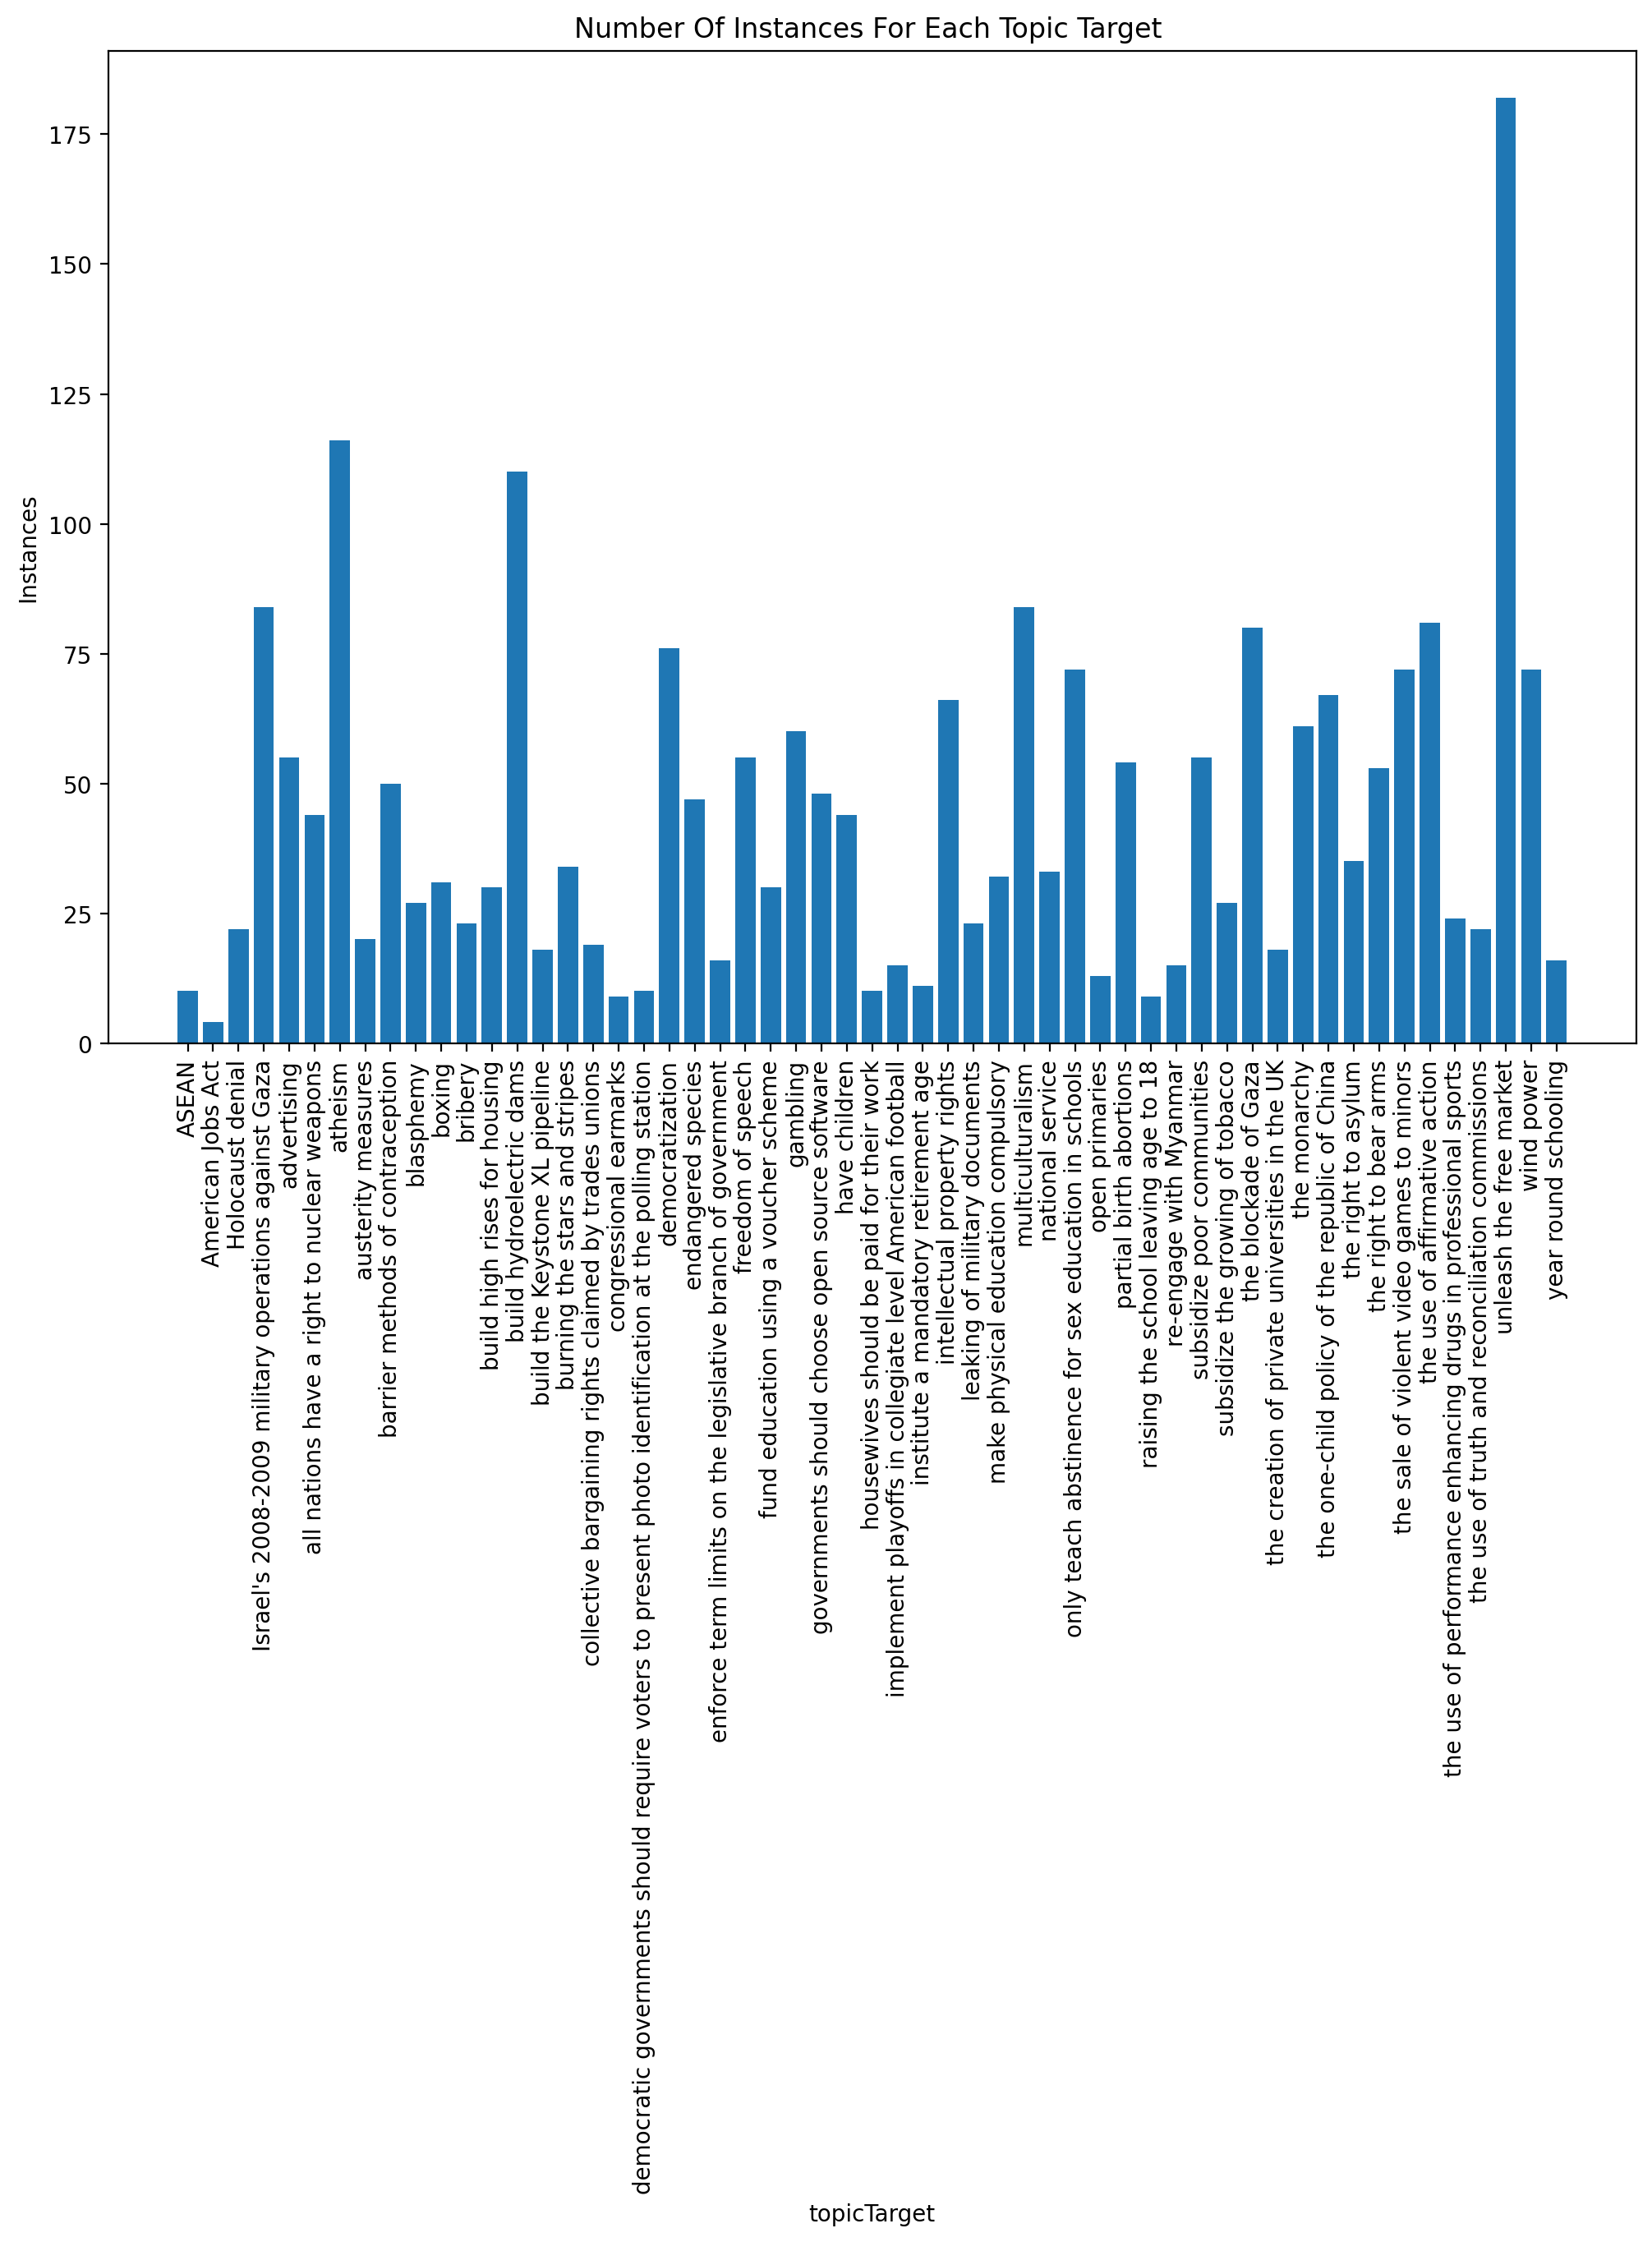

In [44]:
# Distribution of arguments based on its topic Argument
pl_df_arguments_IBM = pd.DataFrame(df_arguments_IBM['topicTarget'].value_counts())
pl_df_arguments_IBM['labels'] = pl_df_arguments_IBM.index
pl_df_arguments_IBM = pl_df_arguments_IBM.sort_values(by=['labels'])

plt.figure(dpi = 200, figsize=(12, 8))
plt.xticks(rotation='vertical')
plt.bar(pl_df_arguments_IBM['labels'], pl_df_arguments_IBM['topicTarget'])
plt.title('Number Of Instances For Each Topic Target ')
plt.xlabel('topicTarget')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

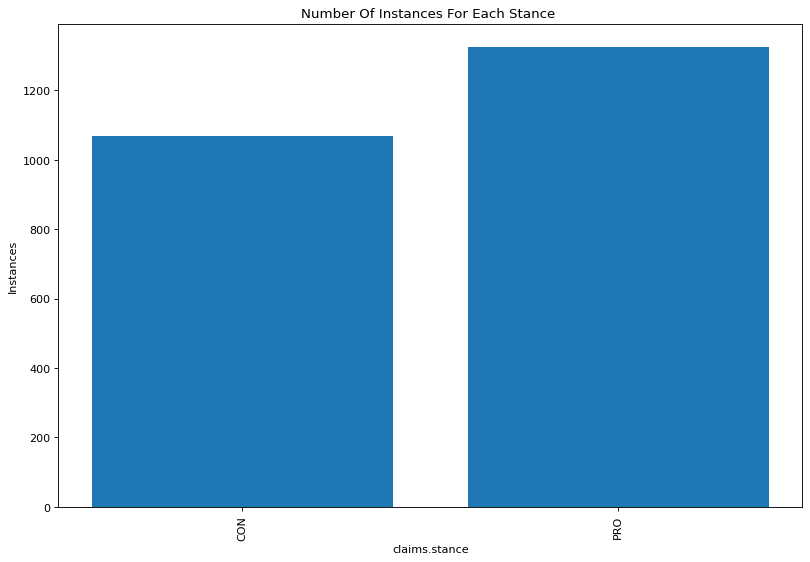

In [45]:
# Distribution of arguments based on its Stance

pl_df_arguments_IBM_2 = pd.DataFrame(df_arguments_IBM['claims.stance'].value_counts())
pl_df_arguments_IBM_2['labels'] = pl_df_arguments_IBM_2.index
pl_df_arguments_IBM_2 = pl_df_arguments_IBM_2.sort_values(by=['labels'])

plt.figure(dpi = 80, figsize=(12, 8))
plt.xticks(rotation='vertical')
plt.bar(pl_df_arguments_IBM_2['labels'], pl_df_arguments_IBM_2['claims.stance'])
plt.title('Number Of Instances For Each Stance ')
plt.xlabel('claims.stance')
plt.ylabel('Instances')

In [46]:
# Creating dataframe with data that will be used 

df_arguments_IBM_final = df_arguments_IBM[['topicId', 'topicTarget', 'claims.stance', 'claims.claimCorrectedText']].copy()

df_arguments_IBM_final.head(5)

,topicId,topicTarget,claims.stance,claims.claimCorrectedText
0,1,the sale of violent video games to minors,PRO,Exposure to violent video games causes at leas...
1,1,the sale of violent video games to minors,CON,video game violence is not related to serious ...
2,1,the sale of violent video games to minors,CON,some violent video games may actually have a p...
3,1,the sale of violent video games to minors,PRO,exposure to violent video games causes both sh...
4,1,the sale of violent video games to minors,PRO,Violent video games increase the violent tende...


### UKP Data

In [47]:
df_arguments_UKP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595 entries, 0 to 3594
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topic       3595 non-null   object
 1   sentence_1  3595 non-null   object
 2   sentence_2  3595 non-null   object
 3   label       3595 non-null   object
dtypes: object(4)
memory usage: 112.5+ KB


Text(0, 0.5, 'Instances')

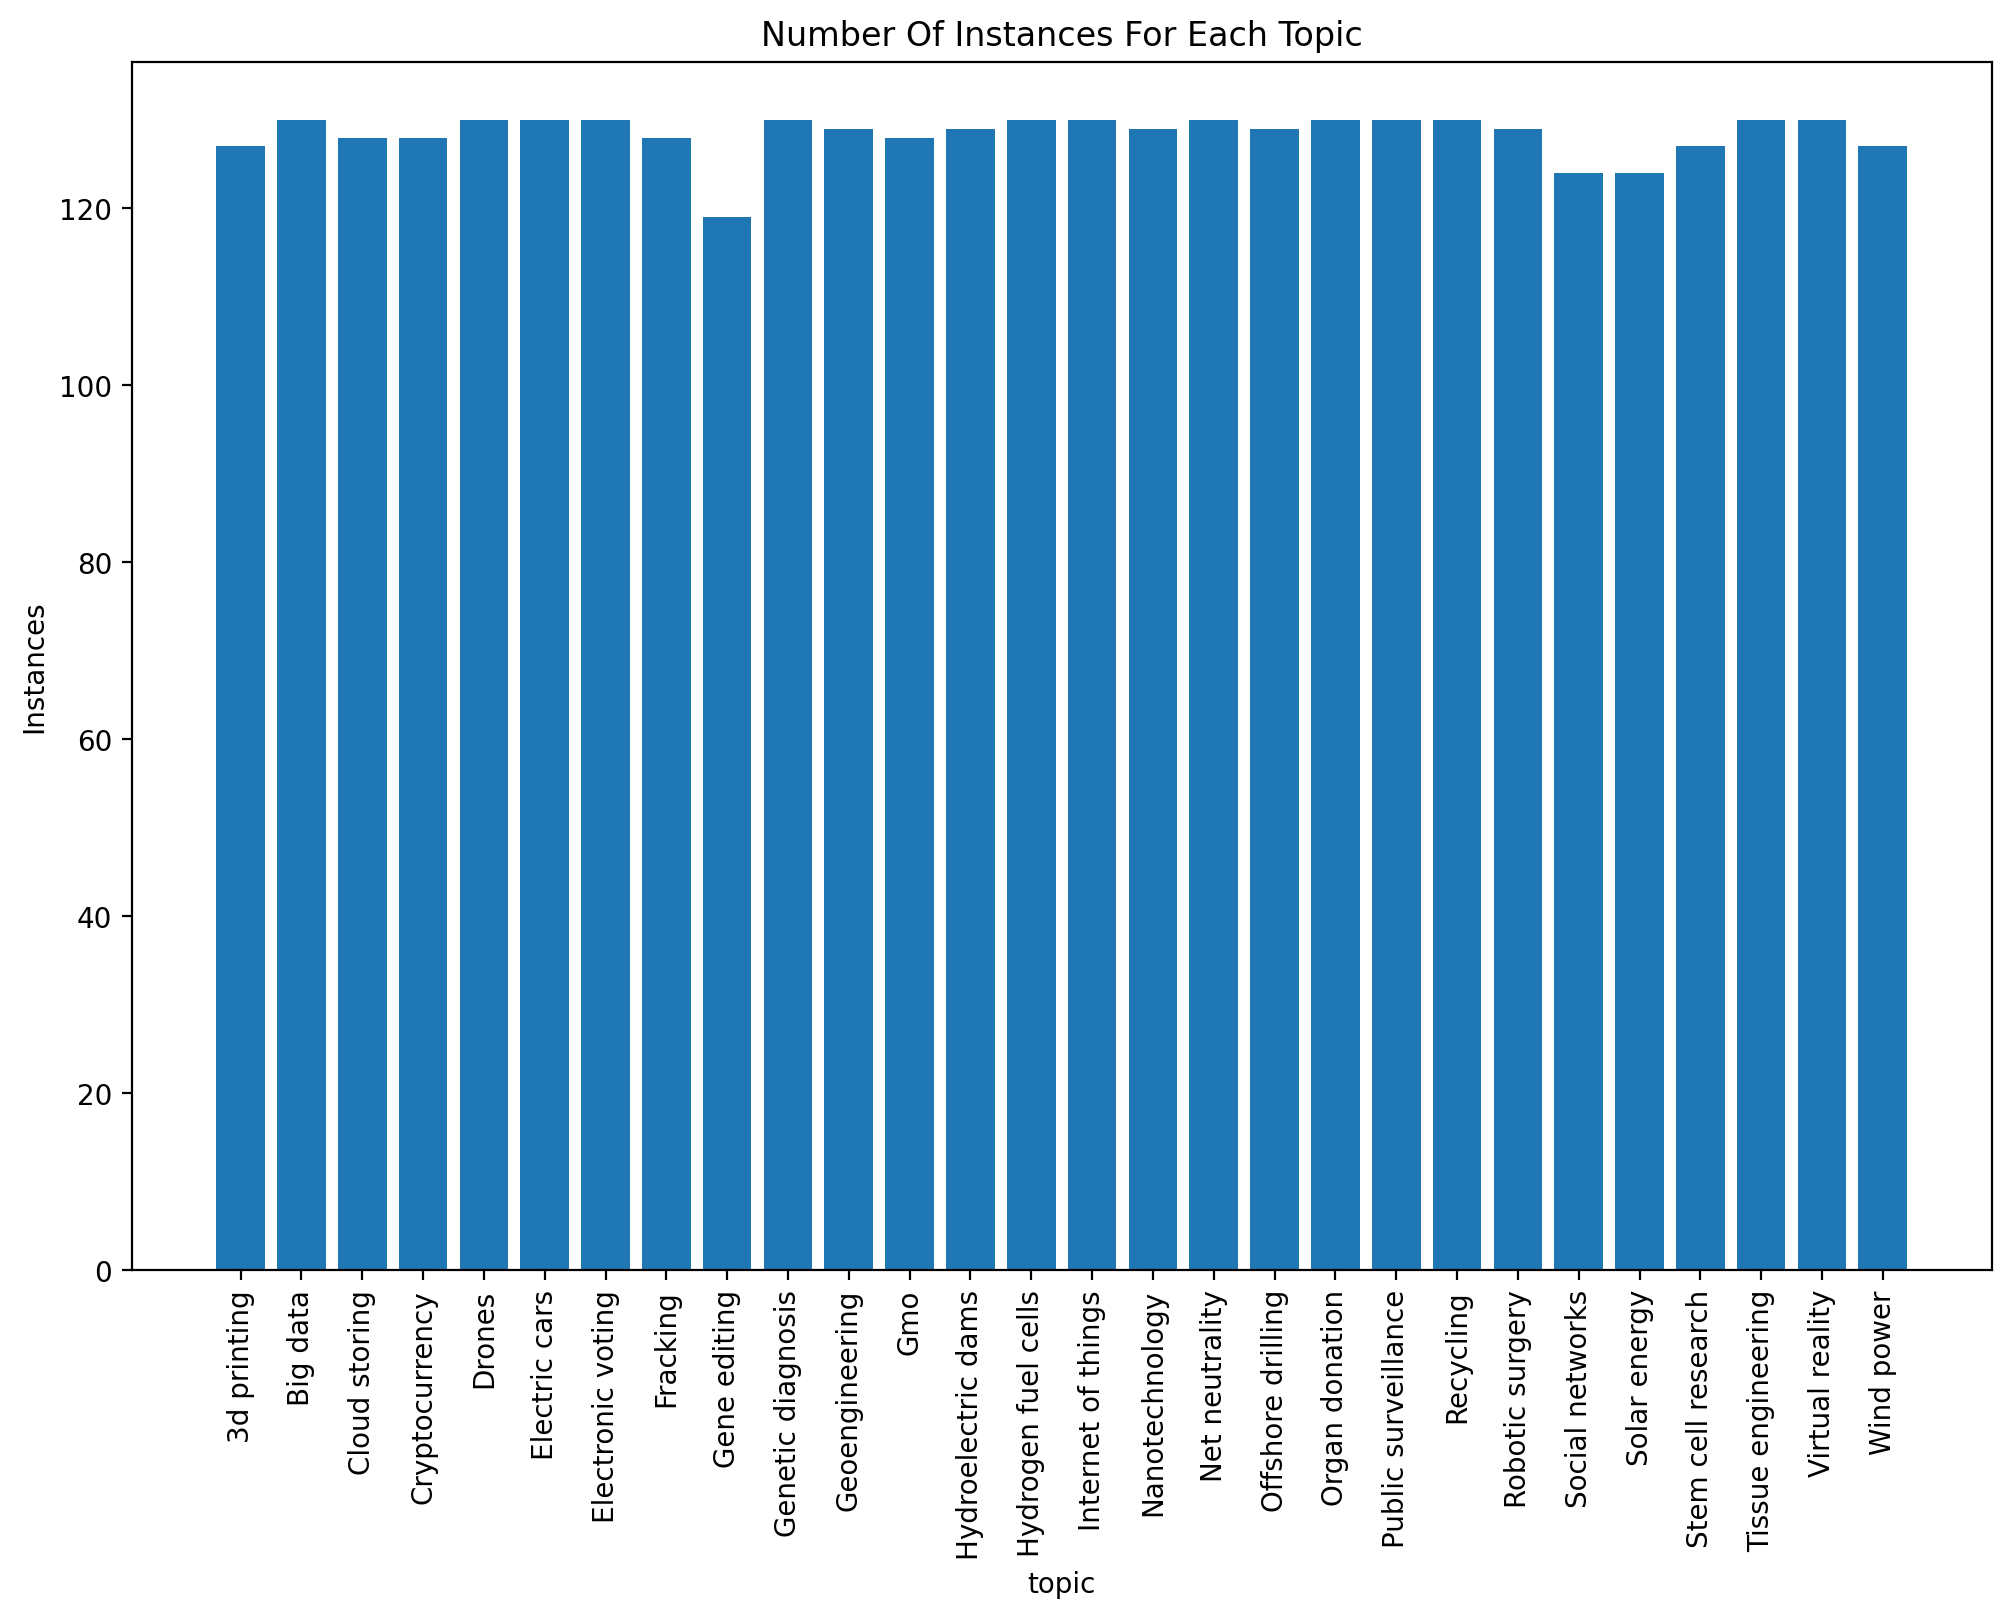

In [48]:
# Distribution of arguments based on its topic Argument
pl_df_arguments_UKP = pd.DataFrame(df_arguments_UKP['topic'].value_counts())
pl_df_arguments_UKP['labels'] = pl_df_arguments_UKP.index
pl_df_arguments_UKP = pl_df_arguments_UKP.sort_values(by=['labels'])

plt.figure(dpi = 200, figsize=(12, 8))
plt.xticks(rotation='vertical')
plt.bar(pl_df_arguments_UKP['labels'], pl_df_arguments_UKP['topic'])
plt.title('Number Of Instances For Each Topic')
plt.xlabel('topic')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

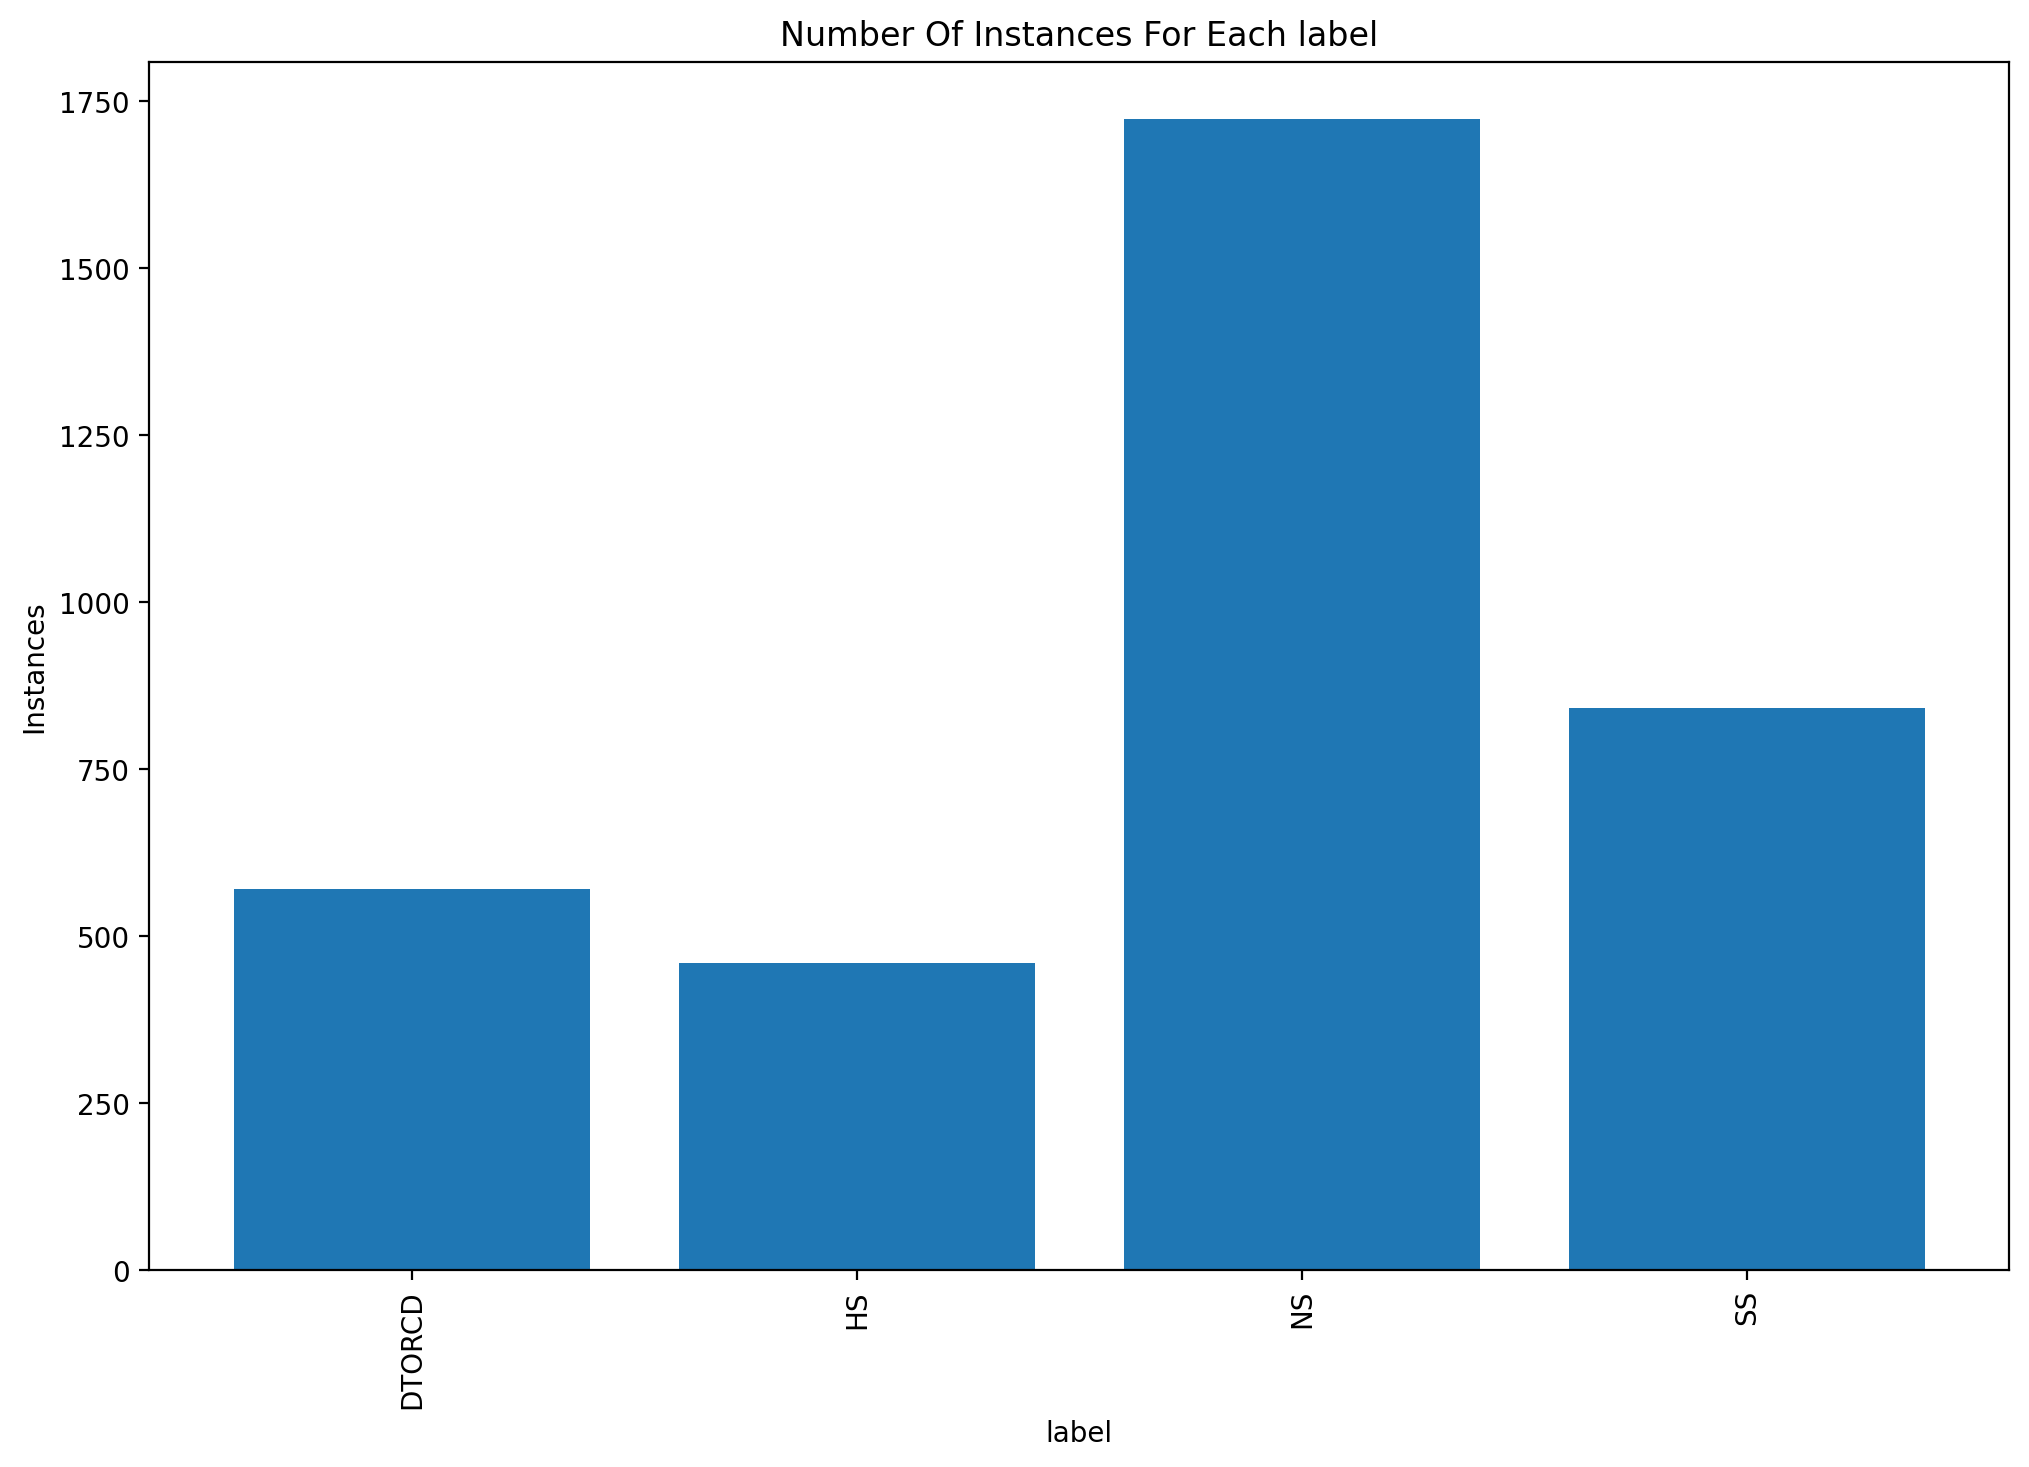

In [49]:
# Distribution of arguments based on its topic Argument
pl_df_arguments_UKP_2 = pd.DataFrame(df_arguments_UKP['label'].value_counts())
pl_df_arguments_UKP_2['labels'] = pl_df_arguments_UKP_2.index
pl_df_arguments_UKP_2 = pl_df_arguments_UKP_2.sort_values(by=['labels'])

plt.figure(dpi = 200, figsize=(12, 8))
plt.xticks(rotation='vertical')
plt.bar(pl_df_arguments_UKP_2['labels'], pl_df_arguments_UKP_2['label'])
plt.title('Number Of Instances For Each label')
plt.xlabel('label')
plt.ylabel('Instances')

In [50]:
df_arguments_UKP_final = df_arguments_UKP.copy()
df_arguments_UKP_final['sentences_combined'] = df_arguments_UKP['sentence_1']+ ' ' + df_arguments_UKP['sentence_2']
df_arguments_UKP_final.head(5)

,topic,sentence_1,sentence_2,label,sentences_combined
0,3d printing,3D Printed Products Can Improve Health Outcome...,"Specifically, the Navy hopes to see 3D printin...",NS,3D Printed Products Can Improve Health Outcome...
1,3d printing,This could greatly increase the quality of lif...,"The advent and spread of new technologies, lik...",DTORCD,This could greatly increase the quality of lif...
2,3d printing,Controlled Print Chamber: Controlled process e...,The new non-clog technology and moisture-lock ...,SS,Controlled Print Chamber: Controlled process e...
3,3d printing,Spark will make visualization of prints much e...,The Cube Pro features a controlled environment...,NS,Spark will make visualization of prints much e...
4,3d printing,Affordable 3D Printing for everyone With the U...,"The Experience Centre, combined with our new S...",SS,Affordable 3D Printing for everyone With the U...


## 2.1 Stop Words

### IBM

In [51]:
# Removing stop words from argument corpus

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df_arguments_IBM_final['claims.text'] = df_arguments_IBM_final['claims.claimCorrectedText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_arguments_IBM_final.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,topicId,topicTarget,claims.stance,claims.claimCorrectedText,claims.text
0,1,the sale of violent video games to minors,PRO,Exposure to violent video games causes at leas...,Exposure violent video games causes least temp...
1,1,the sale of violent video games to minors,CON,video game violence is not related to serious ...,video game violence related serious aggressive...
2,1,the sale of violent video games to minors,CON,some violent video games may actually have a p...,violent video games may actually prosocial eff...
3,1,the sale of violent video games to minors,PRO,exposure to violent video games causes both sh...,exposure violent video games causes short term...
4,1,the sale of violent video games to minors,PRO,Violent video games increase the violent tende...,Violent video games increase violent tendencie...
5,1,the sale of violent video games to minors,CON,No conclusive link was found between video gam...,No conclusive link found video game usage viol...
6,1,the sale of violent video games to minors,PRO,violent video games are significantly associat...,violent video games significantly associated w...
7,1,the sale of violent video games to minors,PRO,video game publishers unethically train childr...,video game publishers unethically train childr...
8,1,the sale of violent video games to minors,PRO,violent video games may increase mild forms of...,violent video games may increase mild forms ag...
9,1,the sale of violent video games to minors,PRO,exposure to violent video games results in inc...,exposure violent video games results increased...


In [52]:
# Lower case all word for better proccessing

df_arguments_IBM_final['claims.text'] = [word.lower() for word in df_arguments_IBM_final['claims.text']]
df_arguments_IBM_final.head(5)

,topicId,topicTarget,claims.stance,claims.claimCorrectedText,claims.text
0,1,the sale of violent video games to minors,PRO,Exposure to violent video games causes at leas...,exposure violent video games causes least temp...
1,1,the sale of violent video games to minors,CON,video game violence is not related to serious ...,video game violence related serious aggressive...
2,1,the sale of violent video games to minors,CON,some violent video games may actually have a p...,violent video games may actually prosocial eff...
3,1,the sale of violent video games to minors,PRO,exposure to violent video games causes both sh...,exposure violent video games causes short term...
4,1,the sale of violent video games to minors,PRO,Violent video games increase the violent tende...,violent video games increase violent tendencie...


### UKP

In [53]:
# Removing stop words from argument corpus

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df_arguments_UKP_final['sentences_combined'] = df_arguments_UKP_final['sentences_combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_arguments_UKP_final['sentence_1'] = df_arguments_UKP_final['sentence_1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_arguments_UKP_final['sentence_2'] = df_arguments_UKP_final['sentence_2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_arguments_UKP_final.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,topic,sentence_1,sentence_2,label,sentences_combined
0,3d printing,3D Printed Products Can Improve Health Outcome...,"Specifically, Navy hopes see 3D printing help ...",NS,3D Printed Products Can Improve Health Outcome...
1,3d printing,This could greatly increase quality life curre...,"The advent spread new technologies, like 3D pr...",DTORCD,This could greatly increase quality life curre...
2,3d printing,Controlled Print Chamber: Controlled process e...,The new non-clog technology moisture-lock cart...,SS,Controlled Print Chamber: Controlled process e...
3,3d printing,"Spark make visualization prints much easier, s...",The Cube Pro features controlled environment p...,NS,"Spark make visualization prints much easier, s..."
4,3d printing,Affordable 3D Printing everyone With UP Mini 3...,"The Experience Centre, combined new Staples Ea...",SS,Affordable 3D Printing everyone With UP Mini 3...
5,3d printing,The ability printer accept direct pellets mate...,3D printing technology thus offering individua...,NS,The ability printer accept direct pellets mate...
6,3d printing,"If answer ""No"", ""extra cost"" ""hidden cost"" I a...","Before using new drugs people, types stem cell...",DTORCD,"If answer ""No"", ""extra cost"" ""hidden cost"" I a..."
7,3d printing,It also enables Windows Store apps submit 3D p...,This technology could also offer consumers cha...,NS,It also enables Windows Store apps submit 3D p...
8,3d printing,"They succeeded, also believe affordable scanni...",3D printing technology thus offering individua...,NS,"They succeeded, also believe affordable scanni..."
9,3d printing,Moisture-lock cartridge ensures extended shelf...,"It features great flexibility, superb surface ...",SS,Moisture-lock cartridge ensures extended shelf...


In [54]:
# Lower case all word for better proccessing

df_arguments_UKP_final['sentence_1'] = [word.lower() for word in df_arguments_UKP_final['sentence_1']]
df_arguments_UKP_final['sentence_2'] = [word.lower() for word in df_arguments_UKP_final['sentence_2']]
df_arguments_UKP_final['sentences_combined'] = [word.lower() for word in df_arguments_UKP_final['sentences_combined']]
df_arguments_UKP_final.head(5)

,topic,sentence_1,sentence_2,label,sentences_combined
0,3d printing,3d printed products can improve health outcome...,"specifically, navy hopes see 3d printing help ...",NS,3d printed products can improve health outcome...
1,3d printing,this could greatly increase quality life curre...,"the advent spread new technologies, like 3d pr...",DTORCD,this could greatly increase quality life curre...
2,3d printing,controlled print chamber: controlled process e...,the new non-clog technology moisture-lock cart...,SS,controlled print chamber: controlled process e...
3,3d printing,"spark make visualization prints much easier, s...",the cube pro features controlled environment p...,NS,"spark make visualization prints much easier, s..."
4,3d printing,affordable 3d printing everyone with up mini 3...,"the experience centre, combined new staples ea...",SS,affordable 3d printing everyone with up mini 3...


## 2.2 Tokenize words

### IBM

In [55]:
# Making the imput text as a vector of words 

import nltk
nltk.download('punkt')
df_arguments_IBM_final['claims.text.vect'] = [word_tokenize(word) for word in df_arguments_IBM_final['claims.text']]
df_arguments_IBM_final.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,topicId,topicTarget,claims.stance,claims.claimCorrectedText,claims.text,claims.text.vect
0,1,the sale of violent video games to minors,PRO,Exposure to violent video games causes at leas...,exposure violent video games causes least temp...,"[exposure, violent, video, games, causes, leas..."
1,1,the sale of violent video games to minors,CON,video game violence is not related to serious ...,video game violence related serious aggressive...,"[video, game, violence, related, serious, aggr..."
2,1,the sale of violent video games to minors,CON,some violent video games may actually have a p...,violent video games may actually prosocial eff...,"[violent, video, games, may, actually, prosoci..."
3,1,the sale of violent video games to minors,PRO,exposure to violent video games causes both sh...,exposure violent video games causes short term...,"[exposure, violent, video, games, causes, shor..."
4,1,the sale of violent video games to minors,PRO,Violent video games increase the violent tende...,violent video games increase violent tendencie...,"[violent, video, games, increase, violent, ten..."


### UKP

In [56]:
# Making the imput text as a vector of words 

import nltk
nltk.download('punkt')
df_arguments_UKP_final['sentence_1'] = [word_tokenize(word) for word in df_arguments_UKP_final['sentence_1']]
df_arguments_UKP_final['sentence_2'] = [word_tokenize(word) for word in df_arguments_UKP_final['sentence_2']]
df_arguments_UKP_final['sentences_combined_Vect'] = [word_tokenize(word) for word in df_arguments_UKP_final['sentences_combined']]
df_arguments_UKP_final.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,topic,sentence_1,sentence_2,label,sentences_combined,sentences_combined_Vect
0,3d printing,"[3d, printed, products, can, improve, health, ...","[specifically, ,, navy, hopes, see, 3d, printi...",NS,3d printed products can improve health outcome...,"[3d, printed, products, can, improve, health, ..."
1,3d printing,"[this, could, greatly, increase, quality, life...","[the, advent, spread, new, technologies, ,, li...",DTORCD,this could greatly increase quality life curre...,"[this, could, greatly, increase, quality, life..."
2,3d printing,"[controlled, print, chamber, :, controlled, pr...","[the, new, non-clog, technology, moisture-lock...",SS,controlled print chamber: controlled process e...,"[controlled, print, chamber, :, controlled, pr..."
3,3d printing,"[spark, make, visualization, prints, much, eas...","[the, cube, pro, features, controlled, environ...",NS,"spark make visualization prints much easier, s...","[spark, make, visualization, prints, much, eas..."
4,3d printing,"[affordable, 3d, printing, everyone, with, up,...","[the, experience, centre, ,, combined, new, st...",SS,affordable 3d printing everyone with up mini 3...,"[affordable, 3d, printing, everyone, with, up,..."


## 2.3 Lematization

# 3. Data Split and Vectorization

## 3.2 Data Split

### IBM

In [57]:
X = df_arguments_IBM_final['claims.text']
# y = df_arguments_IBM_final['topicTarget']
y = df_arguments_IBM_final['claims.stance']

perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [58]:
# Train and Test split

Train_X_IBM, Test_X_IBM, Train_Y_IBM, Test_Y_IBM = model_selection.train_test_split(X, y, test_size=0.2)
print(f'Train_X_IBM {Train_X_IBM.shape}')
print(f'Test_X_IBM {Test_X_IBM.shape}')
print(f'Train_Y_IBM {Train_Y_IBM.shape}')
print(f'Test_Y_IBM {Test_Y_IBM.shape}')

Train_X_IBM (1915,)
Test_X_IBM (479,)
Train_Y_IBM (1915,)
Test_Y_IBM (479,)


### UKP

In [59]:
X = df_arguments_UKP_final['sentences_combined']
# y = df_arguments_UKP_final['topicTarget']
y = df_arguments_UKP_final['label']

perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)



In [60]:
# Train and Test split

Train_X_UKP, Test_X_UKP, Train_Y_UKP, Test_Y_UKP = model_selection.train_test_split(X, y, test_size=0.2)
print(f'Train_X_UKP {Train_X_UKP.shape}')
print(f'Test_X_UKP {Test_X_UKP.shape}')
print(f'Train_Y_UKP {Train_Y_UKP.shape}')
print(f'Test_Y_UKP {Test_Y_UKP.shape}')

Train_X_UKP (2876,)
Test_X_UKP (719,)
Train_Y_UKP (2876,)
Test_Y_UKP (719,)


## 3.2 Convert words to numerical vectors

### 3.2.1 TF-IDF

### IBM

In [158]:
# Vectorization using TF-IDF  

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_arguments_IBM_final['claims.text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_IBM).astype('float16')
Test_X_Tfidf = Tfidf_vect.transform(Test_X_IBM).astype('float16')

print(Train_X_Tfidf[0])

  (0, 16)	0.2576
  (0, 927)	0.247
  (0, 1170)	0.322
  (0, 2316)	0.293
  (0, 2491)	0.293
  (0, 2542)	0.1781
  (0, 2855)	0.2607
  (0, 3488)	0.281
  (0, 3537)	0.2866
  (0, 3853)	0.31
  (0, 3929)	0.31
  (0, 3998)	0.2607
  (0, 4378)	0.2761


In [109]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=5000, ngram_range=(1,2))
corpus = df_arguments_IBM_final["claims.text"]
vectorizer.fit(corpus)
X_train_TF = vectorizer.transform(Train_X_IBM)
X_test_TF = vectorizer.transform(Test_X_IBM)
dic_vocabulary = vectorizer.vocabulary_

print(vectorizer.vocabulary_)

{'exposure': 1395, 'violent': 4873, 'video': 4855, 'games': 1594, 'causes': 681, 'least': 2107, 'temporary': 4616, 'increase': 1905, 'aggression': 118, 'correlates': 920, 'real': 3570, 'world': 4967, 'exposure violent': 1397, 'violent video': 4878, 'video games': 4857, 'games causes': 1596, 'increase aggression': 1906, 'real world': 3575, 'game': 1591, 'violence': 4868, 'related': 3783, 'serious': 4365, 'aggressive': 119, 'behavior': 550, 'life': 2140, 'video game': 4856, 'game violence': 1593, 'aggressive behavior': 120, 'real life': 3573, 'may': 2262, 'actually': 78, 'prosocial': 3127, 'effect': 1232, 'games may': 1598, 'prosocial effect': 3129, 'short': 4396, 'term': 4627, 'long': 2178, 'players': 2646, 'decreases': 1022, 'short term': 4397, 'long term': 2181, 'prosocial behavior': 3128, 'tendencies': 4622, 'among': 174, 'youth': 4995, 'games increase': 1597, 'among youth': 188, 'no': 2422, 'link': 2159, 'found': 1535, 'usage': 4818, 'activity': 73, 'link found': 2160, 'significantl

In [64]:
# Using the tokenizer function to create numerical vector

# texts = df_arguments_IBM_final['claims.text']

# tokenizer = text.Tokenizer()
# tokenizer.fit_on_texts(texts)

# Train_X_IBM_token = tokenizer.texts_to_sequences(Train_X_IBM)
# Train_X_IBM_token = pad_sequences(Train_X_IBM_token, maxlen=20, padding='post', truncating='post')

In [67]:
# # Test Data
# Test_X_IBM_token = tokenizer.texts_to_sequences(Test_X_IBM)
# Test_X_IBM_token = pad_sequences(Test_X_IBM_token, maxlen=20, padding='post', truncating='post')

### UKP

In [76]:
# Vectorization using TF-IDF  

Tfidf_UKP_vect = TfidfVectorizer(max_features=5000)
Tfidf_UKP_vect.fit(df_arguments_UKP_final['sentences_combined'])
Train_X_Tfidf_UKP = Tfidf_UKP_vect.transform(Train_X_UKP)
Test_X_Tfidf_UKP = Tfidf_UKP_vect.transform(Test_X_UKP)

print(Tfidf_UKP_vect.vocabulary_)

{'3d': 76, 'printed': 3414, 'products': 3449, 'can': 674, 'improve': 2201, 'health': 2050, 'outcomes': 3140, 'reduce': 3627, 'costs': 1026, 'specifically': 4082, 'navy': 2969, 'hopes': 2106, 'see': 3891, 'printing': 3417, 'help': 2062, 'readiness': 3580, 'allow': 291, 'faster': 1746, 'manufacturing': 2736, 'storage': 4157, 'shipping': 3951, 'this': 4427, 'could': 1027, 'greatly': 1985, 'increase': 2231, 'quality': 3538, 'life': 2600, 'currently': 1086, 'living': 2651, 'less': 2578, 'ideal': 2157, 'conditions': 918, 'the': 4393, 'advent': 217, 'spread': 4101, 'new': 3004, 'technologies': 4355, 'like': 2616, 'transform': 4521, 'lives': 2649, 'many': 2738, 'ways': 4872, 'controlled': 988, 'print': 3413, 'chamber': 745, 'process': 3434, 'environment': 1575, 'ensures': 1560, 'true': 4570, 'cad': 661, 'prints': 3418, 'delivers': 1177, 'professional': 3450, 'every': 1629, 'time': 4451, 'non': 3016, 'clog': 808, 'technology': 4356, 'moisture': 2886, 'lock': 2665, 'cartridges': 709, 'ensure': 1

In [29]:
# # Using the tokenizer function to create numerical vector

# texts = df_arguments_UKP_final['sentences_combined']

# tokenizer = text.Tokenizer()
# tokenizer.fit_on_texts(texts)

# Train_X_UKP_token = tokenizer.texts_to_sequences(Train_X_UKP)
# Train_X_UKP_token = pad_sequences(Train_X_UKP_token, maxlen=20, padding='post', truncating='post')

In [32]:
# # Test Data
# Test_X_UKP_token = tokenizer.texts_to_sequences(Test_X_UKP)
# Test_X_UKP_token = pad_sequences(Test_X_UKP_token, maxlen=20, padding='post', truncating='post')

### 3.2.2 Word2Vec

### 3.2.3 BERT

# 4 GPU Acceleration Packages

In [31]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 7.96 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,512 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

# 5 Evaluation Metrics

In [155]:
from sklearn import metrics

def metricas(predicted, y_test, predicted_prob):
  classes = np.unique(y_test)
  y_test_array = pd.get_dummies(y_test, drop_first=False).values
  
  ## Accuracy, Precision, Recall
  accuracy = accuracy_score(y_test, predicted)
  auc = roc_auc_score(y_test, predicted_prob[:,1], multi_class="ovr")
  print("Accuracy:",  round(accuracy,2))
  print("Auc:", round(auc,2))
  print("Detail:")
  print(classification_report(y_test, predicted))
  ## Plot confusion matrix
  cm = confusion_matrix(y_test, predicted)
  fig, ax = plt.subplots()
  sn.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
  ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
  plt.yticks(rotation=0)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
  ## Plot roc
  for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
  ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
  ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
  ax[0].legend(loc="lower right")
  ax[0].grid(True)
  
  ## Plot precision-recall curve
  for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision)))
               
  ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
  ax[1].legend(loc="best")
  ax[1].grid(True)
  plt.show()

# 6. ML Models

# 6.1 Support Vector Machine


### IBM

Accuracy: 0.74
Auc: 0.79
Detail:
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       222
           1       0.73      0.82      0.77       257

    accuracy                           0.74       479
   macro avg       0.74      0.73      0.73       479
weighted avg       0.74      0.74      0.73       479



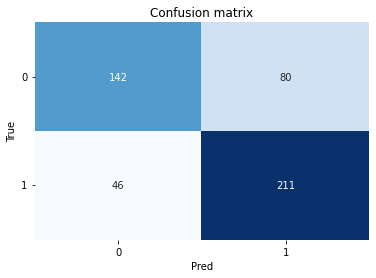

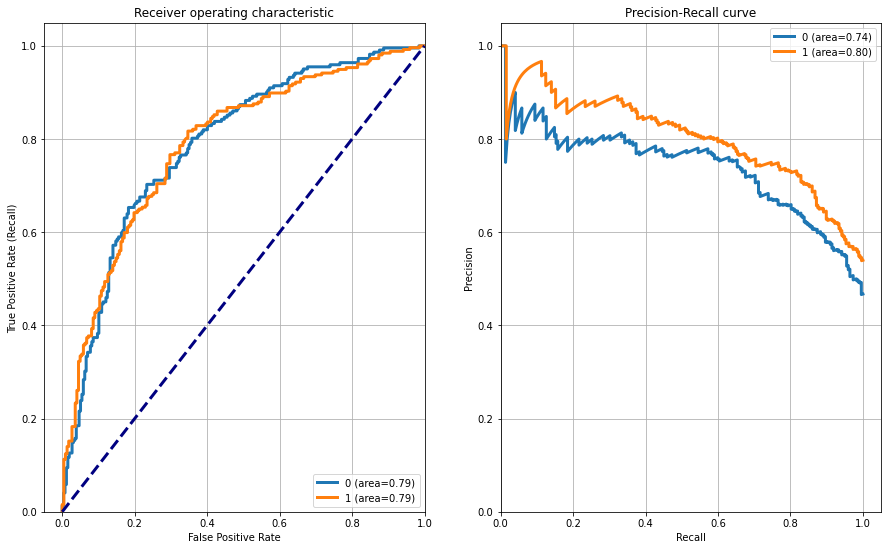

In [159]:
# SVM Classifier

svm_class = svm.SVC(kernel='rbf', C=2, probability=True)
svm_class.fit(X_train_TF,Train_Y_IBM)
pred = svm_class.predict(X_test_TF)

metricas(pred, Test_Y_IBM, svm_class.predict_proba(X_test_TF))


### UKP

In [77]:
# SVM Classifier

svm_class = svm.SVC(kernel='rbf', C=2)
svm_class.fit(Train_X_Tfidf_UKP,Train_Y_UKP)
pred = svm_class.predict(Test_X_Tfidf_UKP)

print("ACC: " + str(accuracy_score(pred, Test_Y_UKP)))

ACC: 0.6133518776077886


# 6.2 Naive Bayes

In [81]:
# Naive Bayes

Naive = naive_bayes.MultinomialNB() 
Naive.fit(Train_X_Tfidf,Train_Y_IBM)# predict the labels on validation dataset 
predictions_NB = Naive.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy 
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_IBM))

Naive Bayes Accuracy Score ->  0.6847599164926931


In [83]:
# Naive Bayes

Naive = naive_bayes.MultinomialNB () 
Naive.fit(Train_X_Tfidf_UKP,Train_Y_UKP)# predict the labels on validation dataset 
predictions_NB = Naive.predict(Test_X_Tfidf_UKP)# Use accuracy_score function to get the accuracy 
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y_UKP))

Naive Bayes Accuracy Score ->  0.5465924895688457


# 7. Deep Learning

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Bidirectional, LSTM

## 7.1 Recurrent Neural Network

### IBM

In [167]:
import keras
model = Sequential([
                    # Flatten(input_shape=[1915, 4390]),
                    #Dropout(0.3),
                    Dense(62, activation="relu", input_shape=[4390]), #Train_X_Tfidf.shape),
                    Dense(62, activation="relu"),
                    Dense(62, activation="relu"),
                    Dense(1, activation="sigmoid")
])
# model.add(Embedding(len(tokenizer.word_counts) + 1, 10, input_length=15))
# model.add(Flatten(), input_shape[1915, 4390] )
# model.add(Dropout(0.3))
# model.add(Dense(62, activation="relu"))
# model.add(Dense(62, activation="relu"))
# model.add(Dense(62, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 62)                272242    
                                                                 
 dense_33 (Dense)            (None, 62)                3906      
                                                                 
 dense_34 (Dense)            (None, 62)                3906      
                                                                 
 dense_35 (Dense)            (None, 1)                 63        
                                                                 
Total params: 280,117
Trainable params: 280,117
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.fit(Train_X_Tfidf, Train_Y_IBM, batch_size=4, epochs=10, verbose=1, validation_data=(Test_X_Tfidf, Test_Y_IBM))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_10/dense_32/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_10/dense_32/embedding_lookup_sparse/Reshape:0", shape=(None, 62), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_10/dense_32/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


479/479 [==============================] - 8s 5ms/step - loss: 0.6703 - accuracy: 0.5880 - val_loss: 0.6216 - val_accuracy: 0.6597
Epoch 2/10
479/479 [==============================] - 2s 5ms/step - loss: 0.3557 - accuracy: 0.8475 - val_loss: 0.6867 - val_accuracy: 0.6722
Epoch 3/10
479/479 [==============================] - 2s 5ms/step - loss: 0.0690 - accuracy: 0.9765 - val_loss: 1.0273 - val_accuracy: 0.6827
Epoch 4/10
479/479 [==============================] - 2s 5ms/step - loss: 0.0118 - accuracy: 0.9953 - val_loss: 1.3452 - val_accuracy: 0.7056
Epoch 5/10
479/479 [==============================] - 2s 5ms/step - loss: 0.0120 - accuracy: 0.9958 - val_loss: 1.3409 - val_accuracy: 0.6889
Epoch 6/10
479/479 [==============================] - 2s 5ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 1.5062 - val_accuracy: 0.7140
Epoch 7/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 1.5930 - val_accuracy: 0.7119
Epoch 8/10
479/47

### UKP

In [ ]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_counts) + 1, 10, input_length=20))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(62, activation="relu"))
model.add(Dense(62, activation="relu"))
model.add(Dense(62, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(Train_X_UKP_token, Train_Y_UKP, batch_size=4, epochs=10, verbose=1, validation_data=(Test_X_UKP_token, Test_Y_UKP))

## 7.2 Convolutional Neural Network

### IBM

### UKP

# 8. PLN + ANN

### IBM

### UKP